### Time Trends

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import plotly.graph_objects as go

In [5]:
data= pd.read_csv('truncated_waittimes.csv', index_col='eruptionID')
fig = go.Figure(data=go.Scatter(x=data['eruption_time_epoch'],y=data['waiting_min'],mode='markers', marker_color='royalblue', line=dict(color='DarkSlateGrey', width=0.5)))  
fig.update_xaxes(title= 'Unix Time (s)')
fig.update_yaxes(title= 'Waiting Interval (min)')
fig.update_layout(title='Waiting Interval vs. Time (1970-2019)')
fig.show()
                

In [10]:
# shape data
X = data["waiting_min"].values.reshape(-1, 1)
y = data["dur"].values.reshape(-1, 1)
print("Shape: ", X.shape, y.shape)

Shape:  (18592, 1) (18592, 1)


In [11]:
# Use sklearn's `train_test_split` to split the data into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [12]:
# Create the model
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [13]:
# Fit the model to the training data. 
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [15]:
# Calculate the mean_squared_error and the r-squared value
from sklearn.metrics import mean_squared_error, r2_score

# Use our model to make predictions
predicted = model.predict(X_test)

# Score the predictions with mse and r2
mse = mean_squared_error(y_test, predicted)
r2 = r2_score(y_test, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

Mean Squared Error (MSE): 0.4260522094646597
R-squared (R2 ): 0.6330604469647225


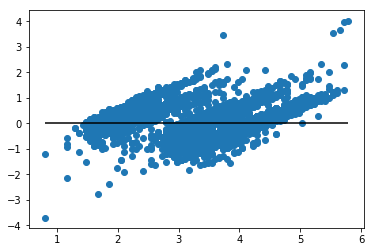

In [17]:
plt.scatter(predicted, predicted - y_test)
plt.hlines(y=0, xmin=predicted.min(), xmax=predicted.max())
plt.show()

In [20]:
data= pd.read_csv('truncated_waittimes.csv', index_col='eruptionID')
fig = go.Figure(data=go.Scatter(x=data['eruption_time_epoch'],y=data['dur'],mode='markers', marker_color='green', line=dict(color='DarkSlateGrey', width=0.5)))  
fig.update_xaxes(title= 'Unix Time (s)')
fig.update_yaxes(title= 'Duration of Eruption (min)')
fig.update_layout(title='Duration of Eruption vs. Time (1970-2019)')
fig.show()
                